In [1]:
import numpy as np 
import pandas as pd

import warnings
warnings.filterwarnings( 'ignore' )

dataset = pd.read_csv( '.\datasets\heart_failure_clinical_records_dataset.csv' )

In [2]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [3]:
dataset.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
dataset.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


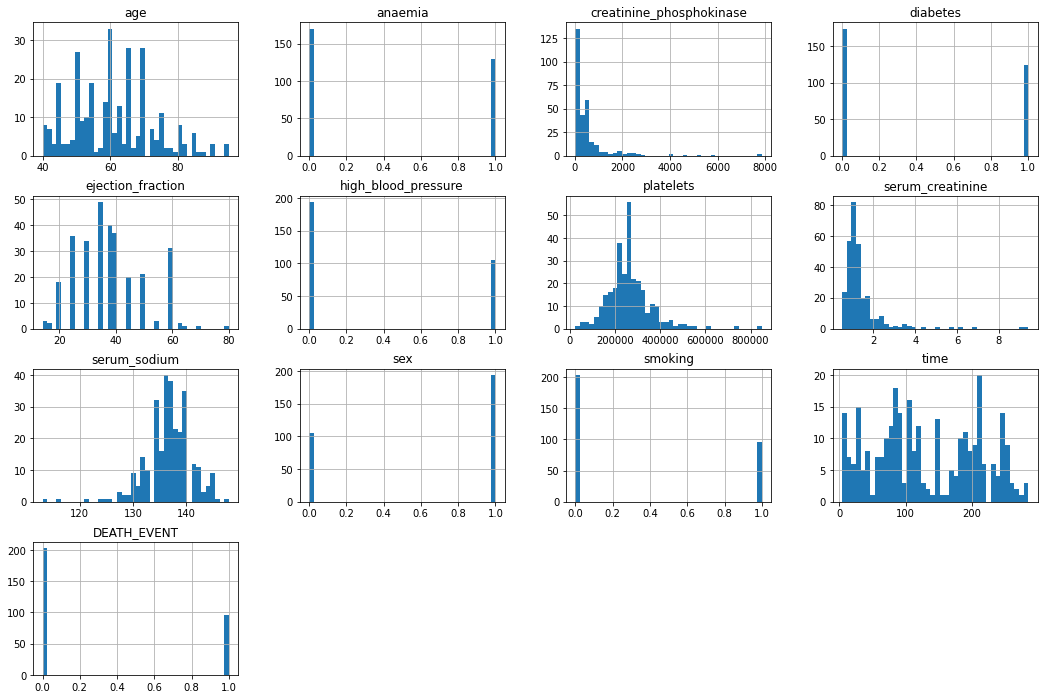

In [5]:
import matplotlib.pyplot as plt

dataset.hist(bins = 40, figsize = ( 18, 12 ))
plt.show()

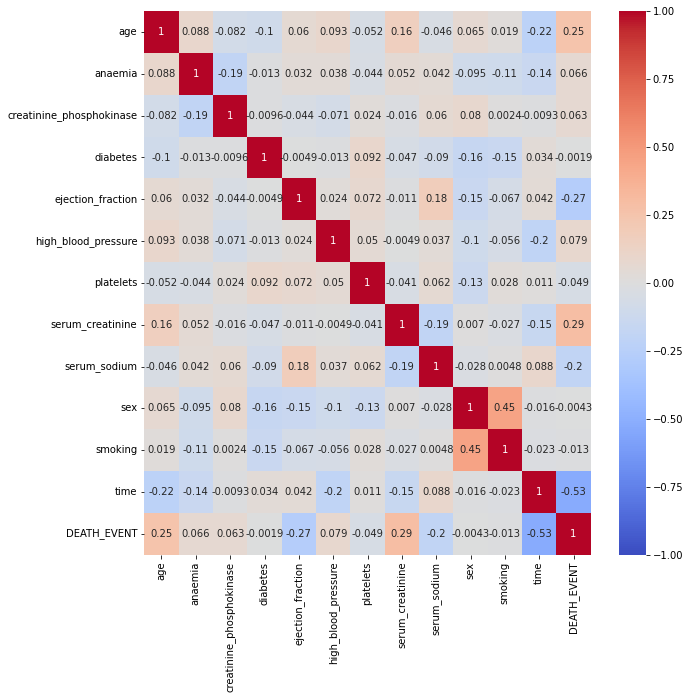

In [6]:
import seaborn as sns

corr_matrix = dataset.corr()
ax, fig = plt.subplots(figsize = ( 10, 10 ))
sns.heatmap(corr_matrix, vmin = -1, cmap = 'coolwarm', annot = True)
plt.show()

In [7]:
corr_matrix[ abs(corr_matrix['DEATH_EVENT']) > 0.1 ]['DEATH_EVENT']

age                  0.253729
ejection_fraction   -0.268603
serum_creatinine     0.294278
serum_sodium        -0.195204
time                -0.526964
DEATH_EVENT          1.000000
Name: DEATH_EVENT, dtype: float64

age :  0.09497915140470801
anaemia :  0.02686578765466596
creatinine_phosphokinase :  0.0739097794181909
diabetes :  0.030837557756253478
ejection_fraction :  0.13729204091273678
high_blood_pressure :  0.02389255466656842
platelets :  0.06881495760070648
serum_creatinine :  0.11957446813459123
serum_sodium :  0.08454453765435735
sex :  0.024284298273594317
smoking :  0.0274185676692524
time :  0.28758629885437464


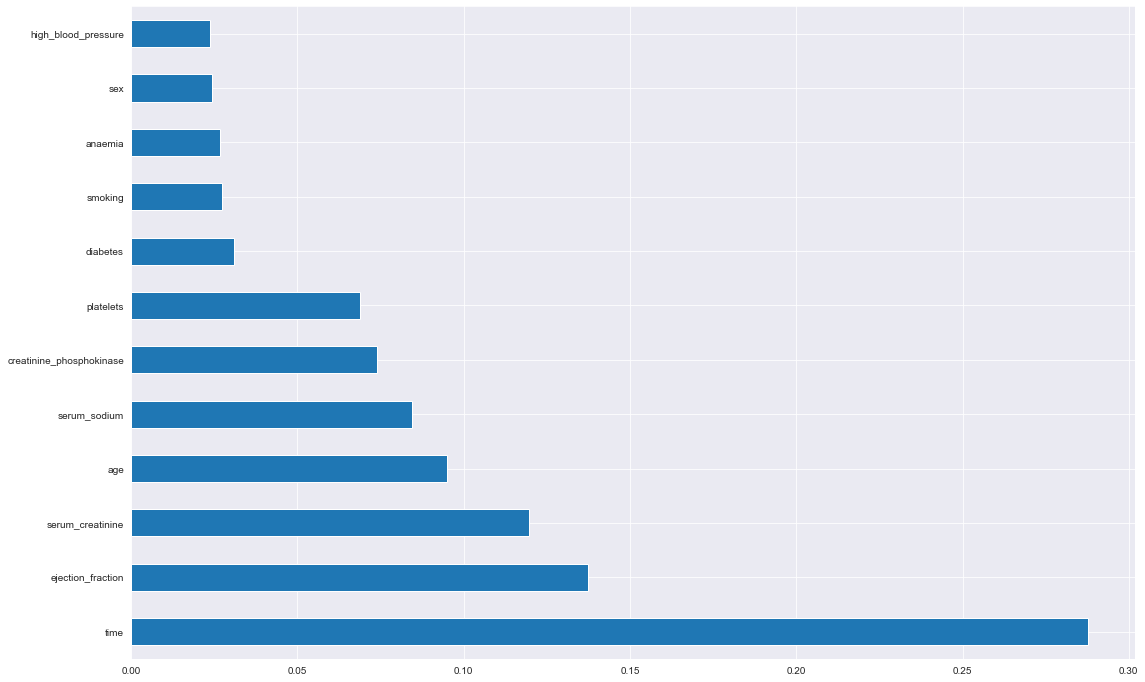

In [8]:
plt.rcParams[ 'figure.figsize' ] = 18, 12 
sns.set_style( 'darkgrid' )

x = dataset.iloc[:, :-1]
y = dataset.iloc[:,-1]

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(x,y)

for name, score in zip(dataset.keys(), model.feature_importances_):
    print( name, ': ', score )


feat_importances = pd.Series( model.feature_importances_, index = x.columns )
feat_importances.nlargest(12).plot( kind = 'barh' )
plt.show()

In [9]:
x = dataset[[ 'time', 'ejection_fraction', 'serum_creatinine', 'serum_sodium' ]].values
y = dataset[ 'DEATH_EVENT' ].values

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size = 0.2, random_state = 42, stratify = y )

In [10]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


LOGISTIC REGRESSION

In [11]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit( x_train, y_train )

LogisticRegression()

In [12]:
y_pred = classifier.predict(x_test)

In [13]:
mylist = []

from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)

mylist.append(ac)

print( cm )
print( ac )

[[39  2]
 [10  9]]
0.8


K NEAREST NEIGHBOR

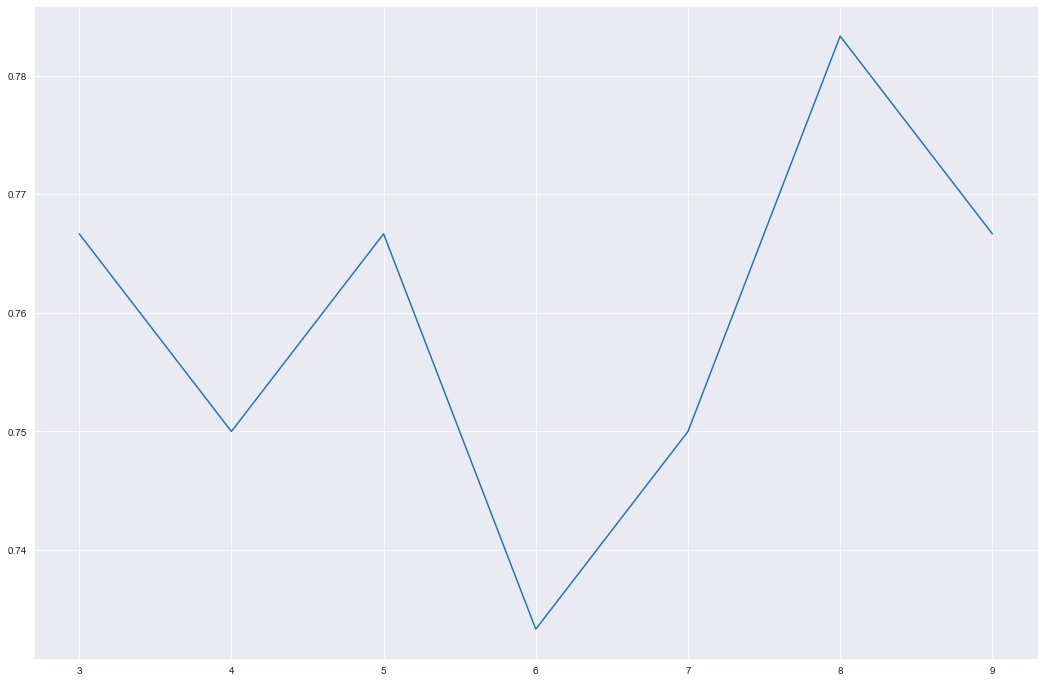

In [14]:
from sklearn.neighbors import KNeighborsClassifier

list1 = []

for neighbors in range(3,10):
    classifier = KNeighborsClassifier( n_neighbors = neighbors, metric='minkowski')
    classifier.fit( x_train, y_train )
    y_pred = classifier.predict( x_test )
    list1.append(accuracy_score( y_test, y_pred ))

plt.plot(list(range(3,10)), list1)
plt.show()

In [15]:
classifier = KNeighborsClassifier( n_neighbors = 8 )
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [16]:
y_pred = classifier.predict(x_test)

In [17]:
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)

mylist.append(ac)

print(cm)
print(ac)

[[40  1]
 [12  7]]
0.7833333333333333


SUPPORT VECTOR CLASSIFIER

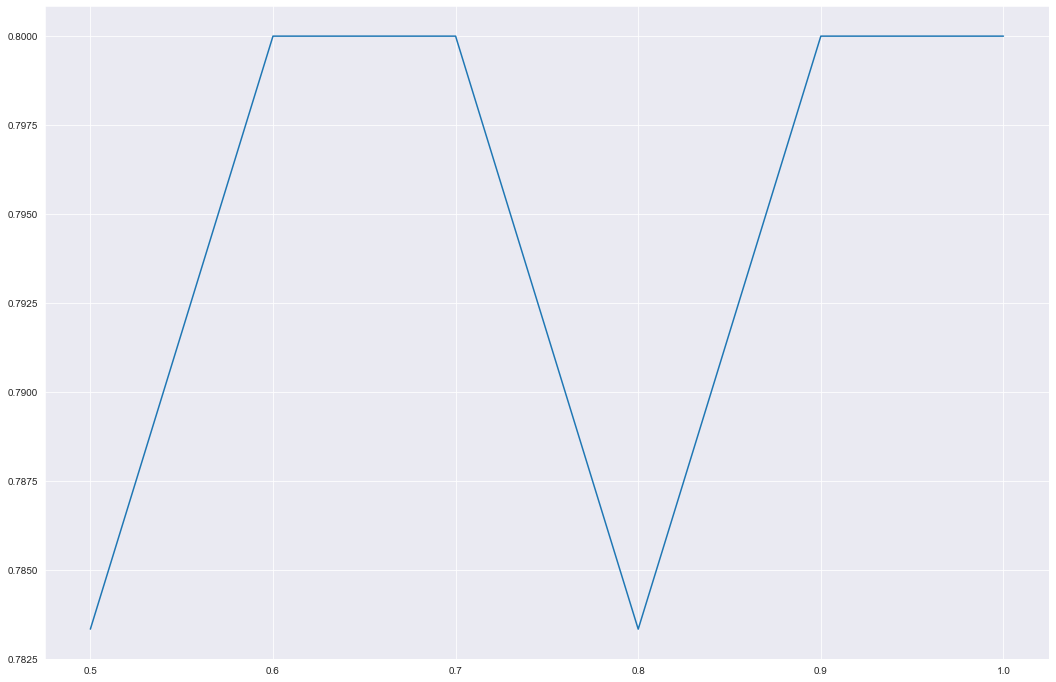

In [21]:
from sklearn.svm import SVC

list1 = []

for c in [0.5,0.6,0.7,0.8,0.9,1.0]:
    classifier = SVC(C = c, random_state=0, kernel = 'rbf')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    list1.append(accuracy_score(y_test,y_pred))
    
plt.plot([0.5,0.6,0.7,0.8,0.9,1.0], list1)
plt.show()

In [ ]:
classifier = SVC(C = 0.9, random_state=0, kernel = 'rbf')
classifier.fit(x_train, y_train)

SVC(C=0.9, random_state=0)

In [ ]:
y_pred = classifier.predict(x_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)

mylist.append(ac)

print(cm)
print(ac)

[[36  5]
 [ 8 11]]
0.7833333333333333


DECISION TREE CLASSIFIER

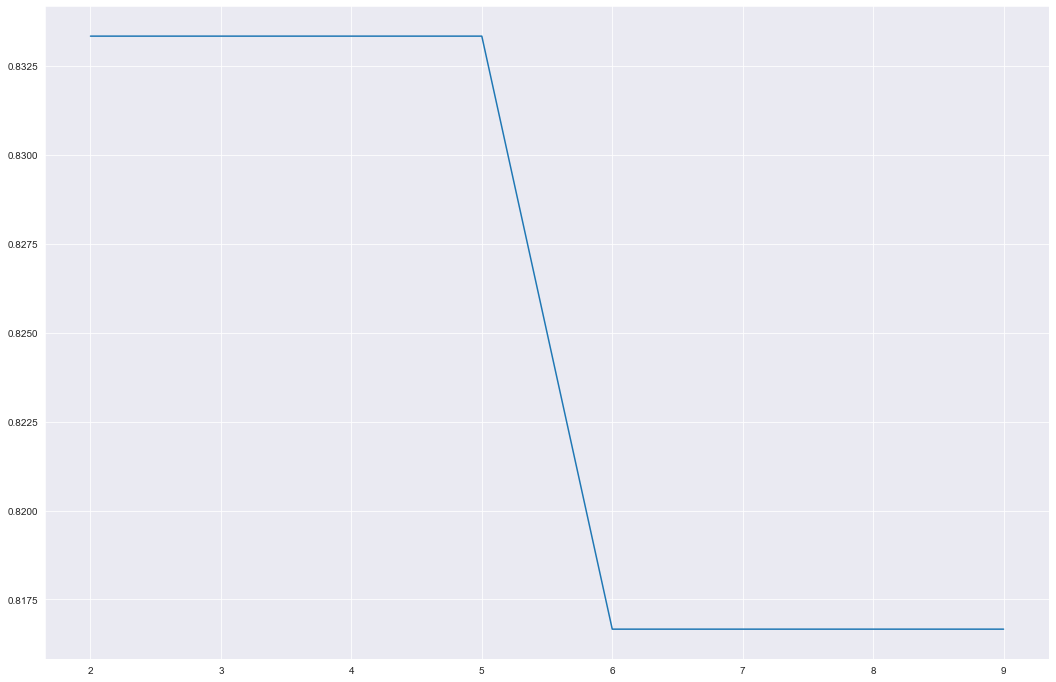

In [22]:
from sklearn.tree import DecisionTreeClassifier

list1 = []

for leaves in range(2,10):
    classifier = DecisionTreeClassifier(max_leaf_nodes = leaves, random_state=0, criterion='entropy')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    list1.append(accuracy_score(y_test,y_pred))

plt.plot(list(range(2,10)), list1)
plt.show()

In [ ]:
classifier = DecisionTreeClassifier(max_leaf_nodes = 3, random_state=0, criterion='entropy')
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=3, random_state=0)

In [ ]:
y_pred = classifier.predict(x_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)

mylist.append(ac)

print(cm)
print(ac)

[[38  3]
 [ 6 13]]
0.85


RANDOM FOREST CLASSIFCATION

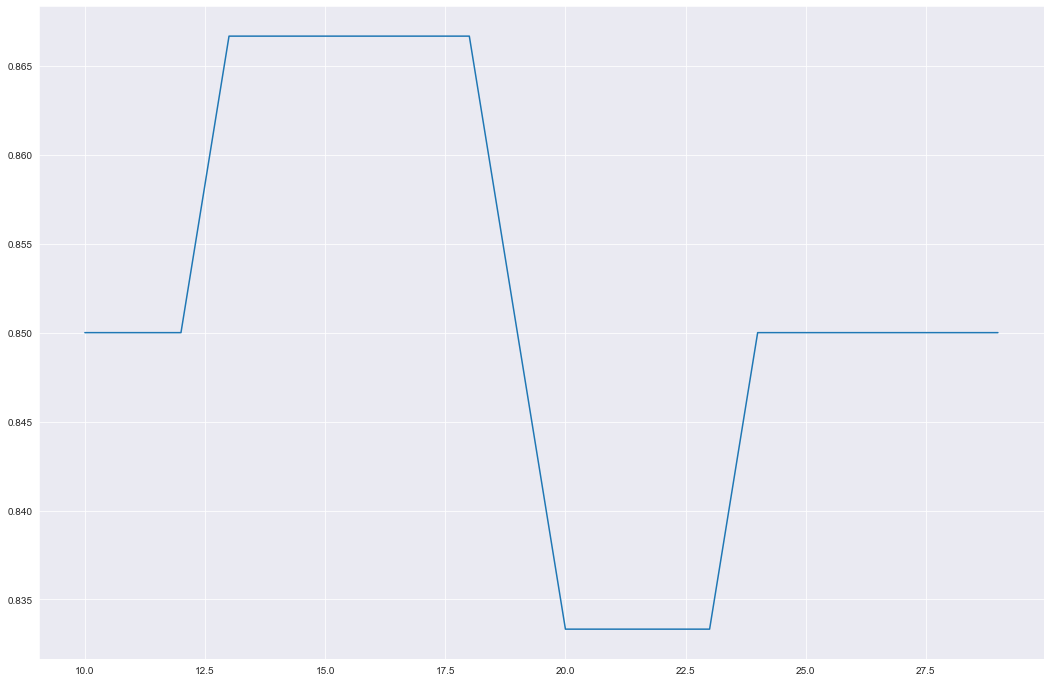

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

list1 = []

for estimators in range(10,30):
    classifier = RandomForestClassifier(n_estimators = estimators, random_state=0, criterion='entropy')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    list1.append(accuracy_score(y_test,y_pred))

plt.plot(list(range(10,30)), list1)
plt.show()

In [ ]:
classifier = RandomForestClassifier(n_estimators = 17, criterion='entropy', random_state=0)
classifier.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=17, random_state=0)

In [ ]:
y_pred = classifier.predict(x_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)

mylist.append(ac)

print(cm)
print(ac)

[[34  7]
 [ 3 16]]
0.8333333333333334


XGBOOST

[17:15:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:15:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:15:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:15:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

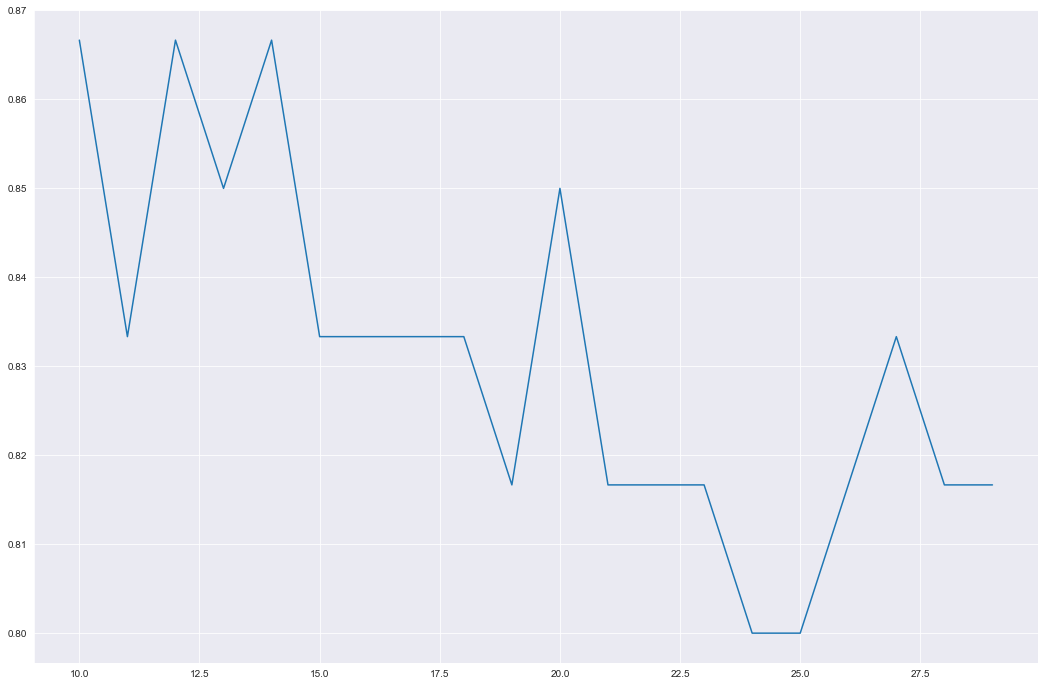

In [ ]:
from xgboost import XGBClassifier

list1 = []

for estimators in range(10,30,1):
    classifier = XGBClassifier(n_estimators = estimators, max_depth=12, subsample=0.7)
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    list1.append(accuracy_score(y_test,y_pred))

plt.plot(list(range(10,30,1)), list1)
plt.show()

In [ ]:
classifier = XGBClassifier(n_estimators = 25, max_depth=12, subsample=0.7)
classifier.fit(x_train,y_train)

[17:15:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=12,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=25, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.7,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
y_pred = classifier.predict(x_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)

mylist.append(ac)

print(cm)
print(ac)

[[35  6]
 [ 6 13]]
0.8


In [ ]:
mylist2 = [ 'Logistic Regression' , 'KNearestNeighbours', 'SupportVector', 'DecisionTree', 'RandomForest', 'XGBOOST' ]

In [ ]:
for name, score in zip(mylist2, mylist):
    print(name, ': ', round(score, 2))

Logistic Regression :  0.83
KNearestNeighbours :  0.75
SupportVector :  0.78
DecisionTree :  0.85
RandomForest :  0.83
XGBOOST :  0.8
